In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split

%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

### Loading the data

In [3]:
county_df = pd.read_csv('/Users/chandrakanth/neuefischer/2020-ds-Project-EDA/King_County_House_prices_dataset.csv')
county_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
Expensive_houses_data = county_df.query('price > price.mean()')

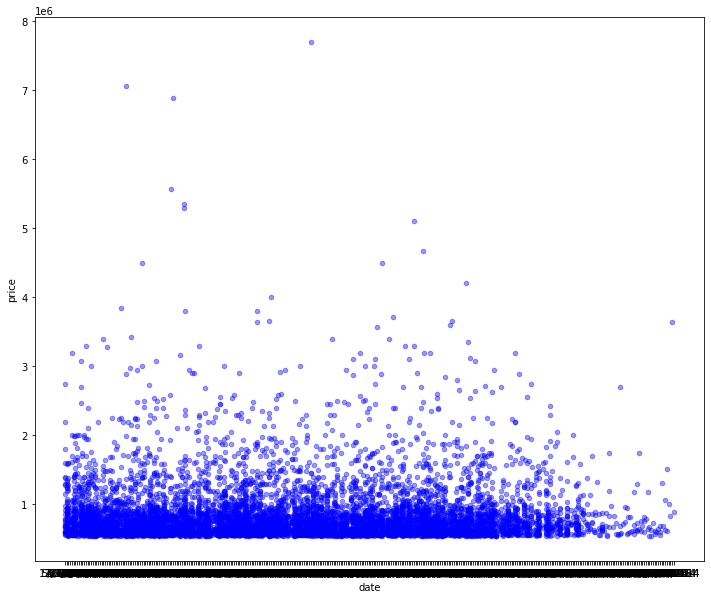

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
Expensive_houses_data.plot(kind='scatter', x='date', y='price', ax=axes, alpha=0.4, color='b')

## Assumptions

#### * Houses are at or near to the water front
#### * kept in good condition
#### * have been graded 6 and above 
#### * Houses are in the city center

## Data analysis and cleaning

In [6]:
county_df.shape

(21597, 21)

In [7]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
county_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### * There are 2 string objects from the info, we convert basement area to numeric and replace error with Nan

#### * There are missing values in waterfront, view, yr_renovated and sqft_basement(after replacing the error)

#### * Assume all Nan values to be zero and replace them

In [9]:
county_df.sqft_basement = pd.to_numeric(county_df.sqft_basement, errors='coerce')

In [10]:
county_df['waterfront']= county_df['waterfront'].fillna(0)

In [11]:
county_df['view'] = county_df['view'].fillna(0)

In [12]:
county_df['yr_renovated'] = county_df['yr_renovated'].fillna(0)

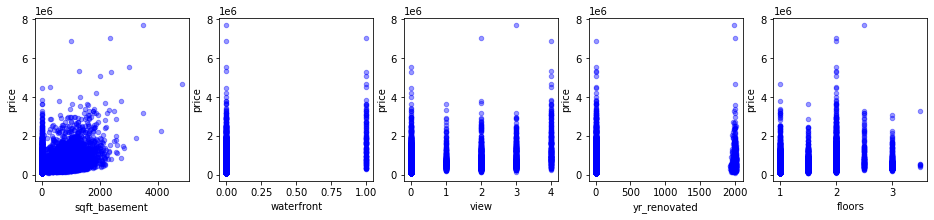

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['sqft_basement', 'waterfront', 'view', 'yr_renovated','floors'], axes):
    county_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

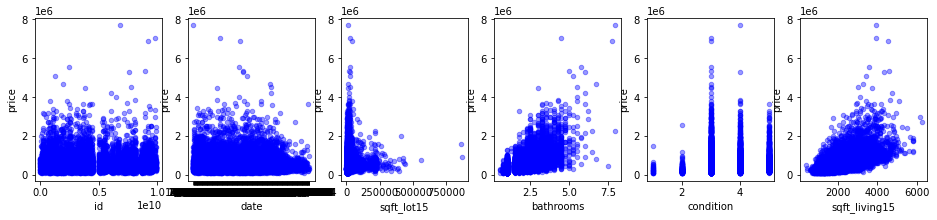

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))

for xcol, ax in zip(['id', 'date', 'sqft_lot15', 'bathrooms','condition','sqft_living15'], axes):
    county_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [15]:
county_df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.117855
floors           0.256804
waterfront       0.264306
lat              0.306692
bedrooms         0.308787
sqft_basement    0.325008
view             0.393497
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

#### * Looking at the above graphs and corelation values, we can drop columns, zipcode,id, date, waterfront, view,yr_renovated, sqft_lot15.

#### * we also keep floors and condition as they seems to show some kind of relationship with price and demand

#### * we also keep sqft_basement and replace missing values with average area

In [16]:
cleaned_county_df = county_df.drop(['id','date', 'waterfront', 'view','yr_renovated', 'sqft_lot15','zipcode'], axis=1)

In [17]:
cleaned_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   condition      21597 non-null  int64  
 7   grade          21597 non-null  int64  
 8   sqft_above     21597 non-null  int64  
 9   sqft_basement  21143 non-null  float64
 10  yr_built       21597 non-null  int64  
 11  lat            21597 non-null  float64
 12  long           21597 non-null  float64
 13  sqft_living15  21597 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.3 MB


#### * No more missing values now

In [18]:
cleaned_county_df['sqft_basement'] = pd.to_numeric(cleaned_county_df.sqft_basement, errors='coerce')

In [19]:
cleaned_county_df.sqft_basement= cleaned_county_df.sqft_basement.fillna(0)

In [20]:
cleaned_county_df['sqft_basement']= cleaned_county_df['sqft_basement'].astype(int)

In [21]:
cleaned_county_df['floors']= cleaned_county_df['floors'].astype(int)

In [22]:
cleaned_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  int64  
 6   condition      21597 non-null  int64  
 7   grade          21597 non-null  int64  
 8   sqft_above     21597 non-null  int64  
 9   sqft_basement  21597 non-null  int64  
 10  yr_built       21597 non-null  int64  
 11  lat            21597 non-null  float64
 12  long           21597 non-null  float64
 13  sqft_living15  21597 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.3 MB


In [23]:
cleaned_county_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15
0,221900.0,3,1.00,1180,5650,1,3,7,1180,0,1955,47.5112,-122.257,1340
1,538000.0,3,2.25,2570,7242,2,3,7,2170,400,1951,47.7210,-122.319,1690
2,180000.0,2,1.00,770,10000,1,3,6,770,0,1933,47.7379,-122.233,2720
3,604000.0,4,3.00,1960,5000,1,5,7,1050,910,1965,47.5208,-122.393,1360
4,510000.0,3,2.00,1680,8080,1,3,8,1680,0,1987,47.6168,-122.045,1800


In [24]:
cleaned_county_df.rename(columns={'bedrooms' : 'number_of_bedrooms', 'sqft_living' : 'total_living_area_sqft','condition':'house_condition',
                         'sqft_lot' : 'lot_area_sqft', 'grade' :'housing_grade', 'sqft_above' : 'living_area_without_basement_sqft',
                          'sqft_basement' : 'basement_area_sqft','lat':'latitude', 'long' :'longitude',
                          'bathrooms':'numberofbathrooms_per_house'}, inplace = True)

In [25]:
cleaned_county_df.head()

,price,number_of_bedrooms,numberofbathrooms_per_house,total_living_area_sqft,lot_area_sqft,floors,house_condition,housing_grade,living_area_without_basement_sqft,basement_area_sqft,yr_built,latitude,longitude,sqft_living15
0,221900.0,3,1.00,1180,5650,1,3,7,1180,0,1955,47.5112,-122.257,1340
1,538000.0,3,2.25,2570,7242,2,3,7,2170,400,1951,47.7210,-122.319,1690
2,180000.0,2,1.00,770,10000,1,3,6,770,0,1933,47.7379,-122.233,2720
3,604000.0,4,3.00,1960,5000,1,5,7,1050,910,1965,47.5208,-122.393,1360
4,510000.0,3,2.00,1680,8080,1,3,8,1680,0,1987,47.6168,-122.045,1800


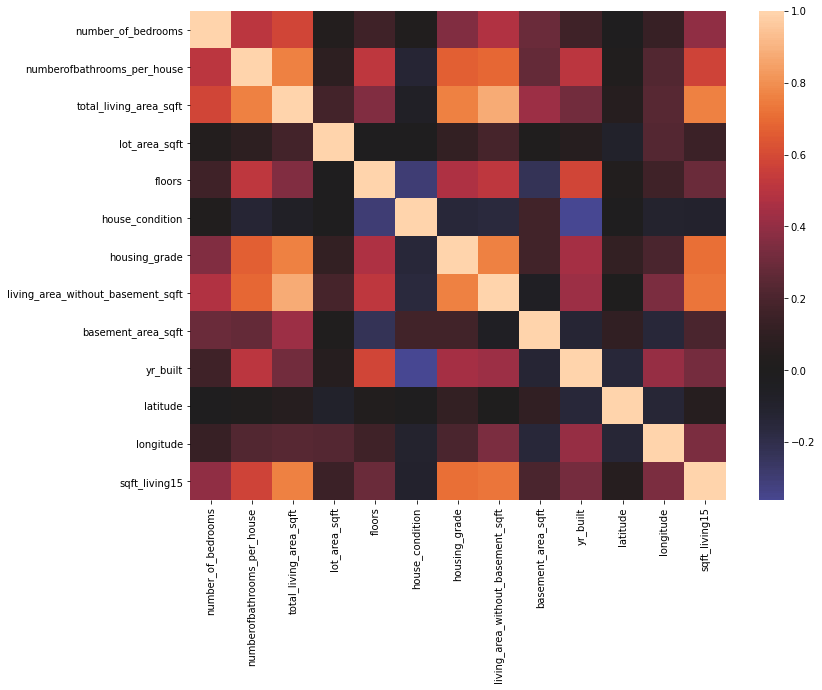

In [26]:
plt.figure(figsize=(12, 9))
x_var = cleaned_county_df.drop('price', axis=1)
sns.heatmap(x_var.corr(), center=0)

In [27]:
abs(x_var.corr()) > 0.85

,number_of_bedrooms,numberofbathrooms_per_house,total_living_area_sqft,lot_area_sqft,floors,house_condition,housing_grade,living_area_without_basement_sqft,basement_area_sqft,yr_built,latitude,longitude,sqft_living15
number_of_bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False
numberofbathrooms_per_house,False,True,False,False,False,False,False,False,False,False,False,False,False
total_living_area_sqft,False,False,True,False,False,False,False,True,False,False,False,False,False
lot_area_sqft,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False
house_condition,False,False,False,False,False,True,False,False,False,False,False,False,False
housing_grade,False,False,False,False,False,False,True,False,False,False,False,False,False
living_area_without_basement_sqft,False,False,True,False,False,False,False,True,False,False,False,False,False
basement_area_sqft,False,False,False,False,False,False,False,False,True,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False


#### we can see from above that 'Living_area_without_basement_sqft' and 'Total_living_area_sqft' are highly corelated.

#### we drop one of those columms to avoid multicollinearity problems in our regression model 

In [28]:
cleaned_county_df.drop('living_area_without_basement_sqft', axis=1, inplace=True)

In [29]:
cleaned_county_df.corr()['price'].sort_values()

longitude                      0.022036
house_condition                0.036056
yr_built                       0.053953
lot_area_sqft                  0.089876
floors                         0.237264
latitude                       0.306692
number_of_bedrooms             0.308787
basement_area_sqft             0.321108
numberofbathrooms_per_house    0.525906
sqft_living15                  0.585241
housing_grade                  0.667951
total_living_area_sqft         0.701917
price                          1.000000
Name: price, dtype: float64

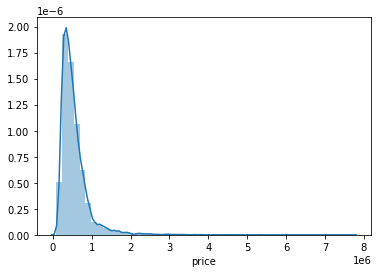

In [30]:
sns.distplot(cleaned_county_df.price)

In [31]:
Expensive_houses_data = cleaned_county_df.query('price > price.mean()')

In [32]:
Expensive_houses_data.shape

(7917, 13)

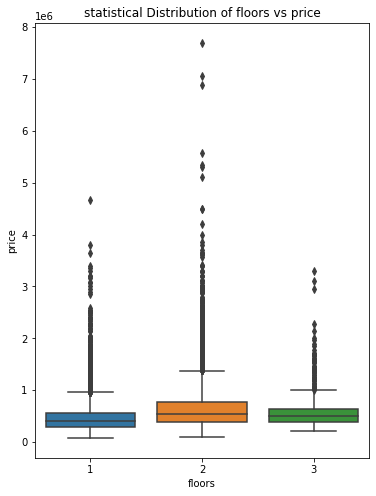

In [33]:
plt.figure(figsize=(6,8))
sns.boxplot(x= cleaned_county_df.floors, y= cleaned_county_df.price)
plt.title("statistical Distribution of floors vs price")
plt.show();

#### * The analysis of data in the normal range is difficult with so many outliers, so we remove the outliers

In [34]:
# removing outliers
cleaned_county_df = cleaned_county_df[(np.abs(stats.zscore(cleaned_county_df.price)) < 3)]

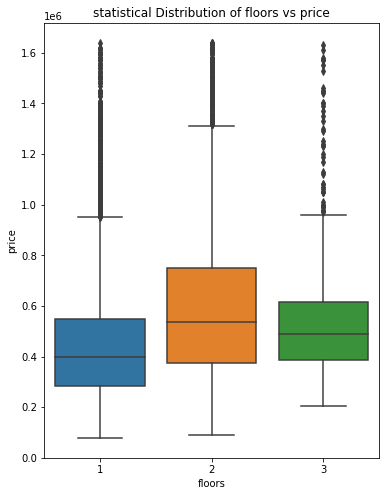

In [35]:
plt.figure(figsize=(6,8))
sns.boxplot(x= cleaned_county_df.floors, y= cleaned_county_df.price)
plt.title("statistical Distribution of floors vs price")
plt.show();

In [36]:
#cleaned_county_df.price = np.log(cleaned_county_df.price)
#sns.distplot(cleaned_county_df.price)

### Price variation with respect important features

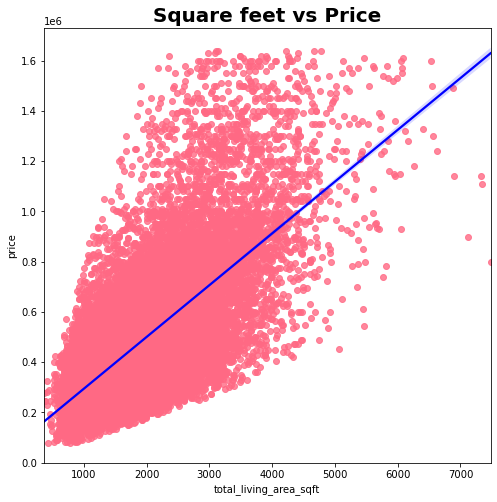

In [37]:
plt.figure(figsize=(8,8))
sns.regplot(x='total_living_area_sqft', y='price', data=cleaned_county_df, color='#FF6984', line_kws={'color':'blue'})
plt.title("Square feet vs Price", fontsize=20, fontweight='bold')
plt.show()

<Figure size 1080x864 with 0 Axes>

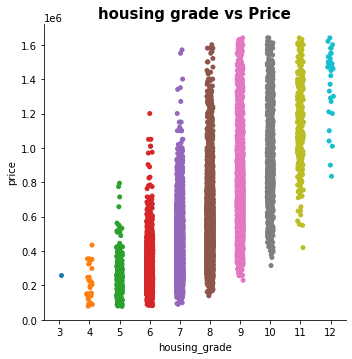

In [38]:
plt.figure(figsize=(15,12))
sns.catplot(x='housing_grade', y='price', data=cleaned_county_df)
plt.title("housing grade vs Price", fontsize=15, fontweight='bold')
plt.show()

<Figure size 1080x720 with 0 Axes>

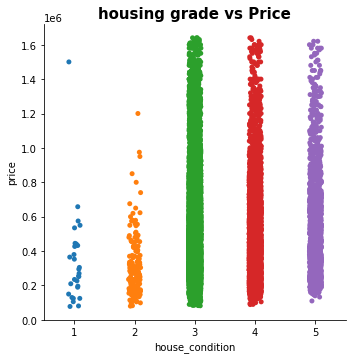

In [39]:
plt.figure(figsize=(15,10))
sns.catplot(x='house_condition', y='price', data=cleaned_county_df)
plt.title("housing grade vs Price", fontsize=15, fontweight='bold')
plt.show()

## Housing Price distribution across the county and Conclusion

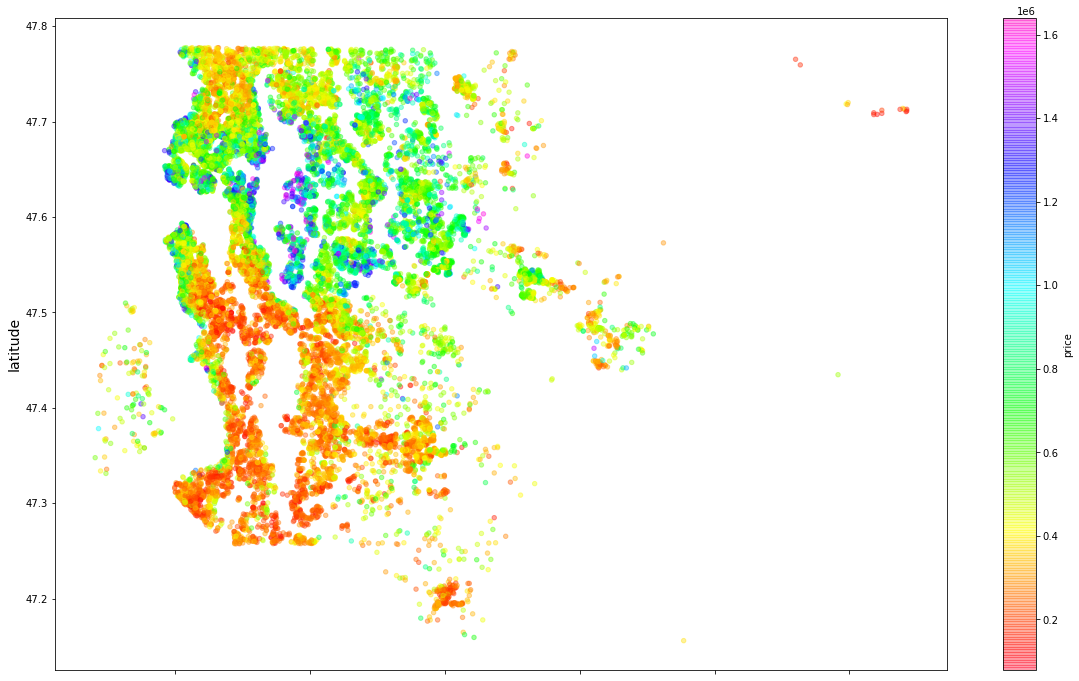

In [40]:
cleaned_county_df.plot(kind="scatter", x="longitude", y="latitude", c="price",
                   cmap = plt.get_cmap("gist_rainbow"), colorbar=True,
                       alpha=0.4, figsize=(20,12))
plt.ylabel("latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)
plt.show()

#### - we can see that the houses located in north east of the king county have a higher sales price
#### - Very expensive houses with peice above avg. price are around 40 %, could be that demand or buyers are less
#### - might take more time to sell
#### - our assumption of waterfront is not necessarily correct
#### - confirmed by our correlation Matrix and internet information on expensive place in king county

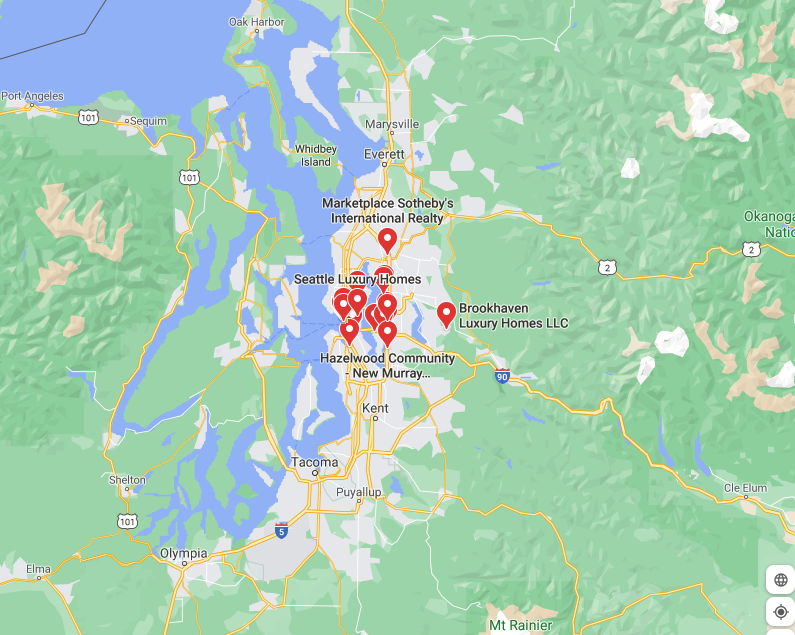

In [41]:
cleaned_county_df.to_csv('model_dataset.csv')